__Note by George Chen (CMU 95-865 Fall 2017 instructor):__
This handwritten digit demo is *heavily* based on an
existing article but for which I largely and intentionally
delayed introduction of *label information* in the data
(i.e., the "ground truth" part of the data that says which
digit 0, 1, ..., 9 that each image corresponds to) since
in practice when we first get unstructured data, we often
do not have/know what the labels should be! The original
article is here (one of the first things they do is read
in the labels; also I removed the dependence on Pandas and
`ggplot` as it's not needed here):
https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
feature_vectors = mnist.data / 255.0

# we will work with a subsample of the data
np.random.seed(95865)
random_sample = np.random.permutation(len(feature_vectors))[:10000]  # 10000 random indices

/Users/georgehc/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/georgehc/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')  # prettier plots

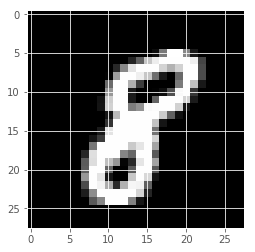

In [3]:
# you can re-run this to see random digits
plt.imshow(feature_vectors[np.random.randint(len(feature_vectors))].reshape(28, 28), cmap='gray')

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # project data down to 2 dimensions
feature_vectors_pca2d = pca.fit_transform(feature_vectors[random_sample])

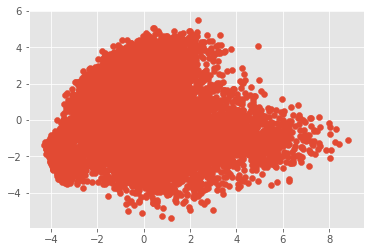

In [5]:
plt.scatter(feature_vectors_pca2d[:, 0], feature_vectors_pca2d[:, 1])

In [6]:
pca.explained_variance_ratio_

array([0.09661835, 0.07152862])

In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=5000)
feature_vectors_tsne2d = tsne.fit_transform(feature_vectors[random_sample])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.573s...
[t-SNE] Computed neighbors for 10000 samples in 119.884s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.126201
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.169151
[t-SNE] KL divergence after 5000 iterations: 1.718413


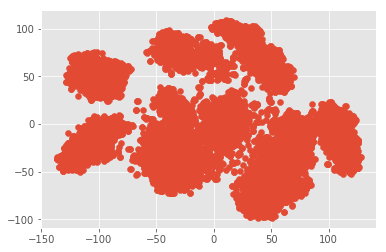

In [8]:
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1])

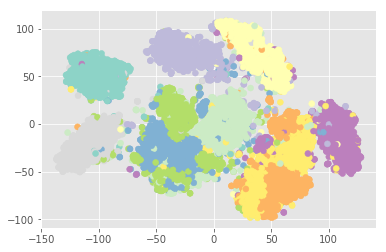

In [9]:
# here we color each low-dimensional t-SNE point differently depending on its true known label for what digit the point corresponds to
# (in many applications we do not have this sort of label information!)
plt.scatter(feature_vectors_tsne2d[:, 0], feature_vectors_tsne2d[:, 1], c=[str(i) for i in mnist.target[random_sample]], cmap='Set3')

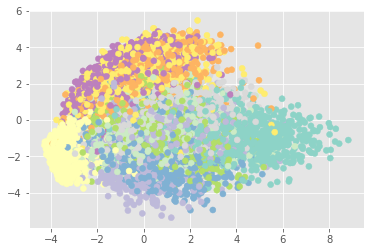

In [10]:
# coloring the points by true digit label, now for PCA
plt.scatter(feature_vectors_pca2d[:, 0], feature_vectors_pca2d[:, 1], c=[str(i) for i in mnist.target[random_sample]], cmap='Set3')